# Compare synergy vs toxicity statistics between databases

File to compare the test statistics between the databases, focusing on the p-value and effect size from the Kruskal-Wallis test and Dunn Post-Hoc test.

In [26]:
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
import glob
from pathlib import Path

In [27]:
# Load statistical summeries per database
ddinter_syntox_df = pd.read_csv('results/database_syntox_analysis/ddinter_synergy_toxicity_statistical_summary.csv')
drugbank_syntox_df = pd.read_csv('results/database_syntox_analysis/drugbank_synergy_toxicity_statistical_summary.csv')

# Combine both dataframes
ddinter_syntox_df["Database"] = "DDInter"
drugbank_syntox_df["Database"] = "DrugBank"
combined_syntox_df = pd.concat([ddinter_syntox_df, drugbank_syntox_df], ignore_index=True)

In [28]:
combined_syntox_df[combined_syntox_df['Synergy_Score'] == "HSA"]

,Synergy_Score,Test_Type,Comparison,Test_Statistic,P_value,P_value_Corrected,Effect_Size_Type,Effect_Size_Value,Database
6,HSA,Kruskal-Wallis,All Groups,H=5.1988e+02,1.285480e-113,NaN,Eta-Squared H,0.017888,DDInter
7,HSA,Dunn Post-Hoc,Major vs Minor,Dunn Z,NaN,2.127599e-02,Cliff's Delta,0.062456,DDInter
8,HSA,Dunn Post-Hoc,Major vs Moderate,Dunn Z,NaN,4.678827e-94,Cliff's Delta,-0.175880,DDInter
9,HSA,Dunn Post-Hoc,Moderate vs Minor,Dunn Z,NaN,7.684547e-30,Cliff's Delta,0.232149,DDInter
10,HSA,Jonckheere-Terpstra,Increasing Trend (Minor->Major),Z=-1.5109e+01,1.000000e+00,NaN,r,-0.088626,DDInter
11,HSA,Jonckheere-Terpstra,Decreasing Trend (Major->Minor),Z=1.5109e+01,0.000000e+00,NaN,r,0.088626,DDInter
48,HSA,Kruskal-Wallis,All Groups,H=3.5306e+02,2.157016e-77,NaN,Eta-Squared H,0.005629,DrugBank
49,HSA,Dunn Post-Hoc,Major vs Minor,Dunn Z,NaN,2.811708e-50,Cliff's Delta,0.114963,DrugBank
50,HSA,Dunn Post-Hoc,Major vs Moderate,Dunn Z,NaN,4.599563e-47,Cliff's Delta,0.074331,DrugBank
51,HSA,Dunn Post-Hoc,Moderate vs Minor,Dunn Z,NaN,3.505858e-06,Cliff's Delta,0.038274,DrugBank


In [29]:
def sci_fmt(x, sig=3):
    """Return mathtext like 1.23×10^{-5} (or 0 for x==0/NaN)."""
    if x is None or np.isnan(x):
        return "0.000"
    if x == 0:
        return "0.000"
    
    if x >= 1e-3:
        return f"{x:.3f}"  # Always show 3 decimal digits, no stripping
    else:
        m, e = f"{x:.{sig}e}".split('e')
        return rf"{m}×10^{{{int(e)}}}"

<>:37: SyntaxWarning: invalid escape sequence '\e'
<>:37: SyntaxWarning: invalid escape sequence '\e'
/var/folders/2k/2mqgxp054vg_3wvy0pbmlt8h0000gn/T/ipykernel_2548/2273169409.py:37: SyntaxWarning: invalid escape sequence '\e'
  eta_str = f"$\eta^2$={eta_val:.3f}"
/var/folders/2k/2mqgxp054vg_3wvy0pbmlt8h0000gn/T/ipykernel_2548/2273169409.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Synergy_Score          Bliss            HSA         Loewe          S_max  \
Database                                                                   
DDInter         1.058538e-01  1.285480e-113  2.553898e-17   2.292631e-73   
DrugBank       5.602728e-168   2.157016e-77  5.061344e-02  2.241798e-148   

Synergy_Score         S_mean          S_sum            ZIP  
Database                                                    
DDInter        1.523171e-131   3.331969e-22   5.064890e-01  
DrugBank       6.712743e-223  1.247023e-170  2.278352e-217  
Synergy_Score     Bliss       HSA     Loewe    S_max    S_mean     S_sum  \
Database                                                                   
DDInter        0.000155  0.017888  0.002629  0.01151  0.020729  0.003403   
DrugBank       0.012279  0.005629  0.000095  0.01084  0.016311  0.012474   

Synergy_Score       ZIP  
Database                 
DDInter        0.000047  
DrugBank       0.015905  


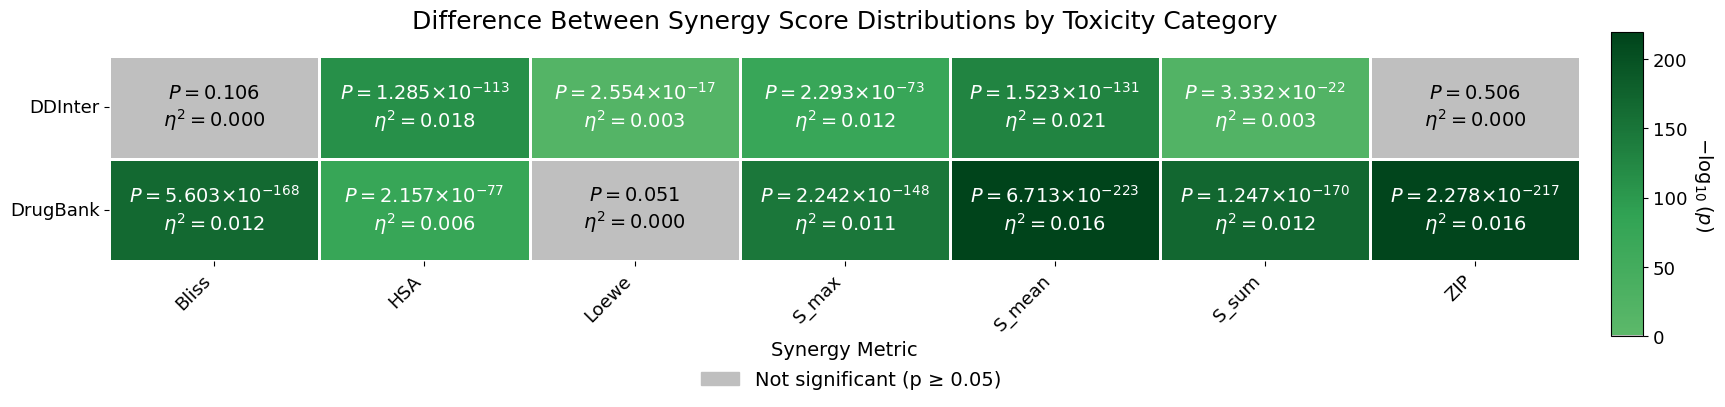

In [30]:
# Extract P-values and Effect Sizes from combined_syntox_df for Kruskal-Wallis test
kw_results = combined_syntox_df[combined_syntox_df['Test_Type'] == 'Kruskal-Wallis'].copy()
# Obtain the list of unique databases and synery metrics
databases = kw_results['Database'].unique()
synergy_metrics = sorted(kw_results['Synergy_Score'].unique())

# P-value matrix
p_matrix = kw_results.pivot_table(
    index='Database', 
    columns='Synergy_Score', 
    values='P_value', 
    aggfunc='first'
).reindex(index=databases, columns=synergy_metrics)
print(p_matrix)
# Effect Size (Eta-Squared H) matrix
eta_matrix = kw_results.pivot_table(
    index='Database', 
    columns='Synergy_Score', 
    values='Effect_Size_Value', 
    aggfunc='first'
).reindex(index=databases, columns=synergy_metrics)
print(eta_matrix)

# Define the function to create the combined annotation string
def create_annotation_matrix(p_mat, eta_mat):
    """Combines P-value and Eta-Squared matrices into a formatted string matrix."""
    
    # Initialize an empty matrix for the final annotation strings
    annot_matrix = pd.DataFrame(index=p_mat.index, columns=p_mat.columns, dtype=str)
    
    for db in p_mat.index:
        for metric in p_mat.columns:
            p_val = p_mat.loc[db, metric]
            eta_val = eta_mat.loc[db, metric]
            
            p_str = f"P={p_val:.3e}"
            eta_str = f"$\eta^2$={eta_val:.3f}"
            
            # Combine with a newline
            annot_matrix.loc[db, metric] = f"{p_str}\n{eta_str}"
            
    return annot_matrix

# Generate the annotation matrix
annotation_matrix = create_annotation_matrix(p_matrix, eta_matrix)

# 3. Significance Matrix: True if p < 0.05, False otherwise, converted to 1/0
sig_matrix = (p_matrix < 0.05).astype(int)

# Plotting the heatmap with annotations
# --- Build value matrix: 0 for non-sig; -log10(p) for sig ---
val = p_matrix.copy().astype(float)
val[:] = np.where(p_matrix < 0.05, -np.log10(p_matrix), 0.0)

# Choose scaling for green intensity
vmax = np.nanpercentile(val[val > 0], 95) if np.any(val > 0) else 1.0  # robust cap
norm = mcolors.Normalize(vmin=0, vmax=vmax)

# --- Custom colormap: 0 -> dark gray; positive -> Greens gradient ---
# start with slightly desaturated green tones
colors = ["#c7e9c0", "#74c476", "#31a354", "#00441b"]
greens_mod = LinearSegmentedColormap.from_list("greens_mod", colors, N=256)
# combine with light gray for non-significant cells
cmap_list = np.vstack((
    mcolors.to_rgba('#bfbfbf'),  # lighter gray for non-sig
    greens_mod(np.linspace(0.45, 1, 255))
))
cmap = mcolors.ListedColormap(cmap_list)
def annotation_color(p):
    return 'black' if p > 0.05 else 'white'

# --- Heatmap ---
fig = plt.figure(figsize=(16, 3.8))
ax = sns.heatmap(
    val,
    annot=False,  # disable built-in annotations for now
    cmap=cmap,
    norm=norm,
    linewidths=1,
    linecolor='white',
    cbar=False
)

# --- Manually overlay annotation text with conditional colors ---
for i, db in enumerate(p_matrix.index):
    for j, metric in enumerate(p_matrix.columns):
        p_val  = float(p_matrix.loc[db, metric])
        eta_val = float(eta_matrix.loc[db, metric])

        color = "black" if p_val > 0.05 else "white"
        # use mathtext ($ ... $) so ×10^{…} renders nicely
        text = rf"$P={sci_fmt(p_val, 3)}$" + "\n" + rf"$\eta^2={eta_val:.3f}$"

        ax.text(j + 0.5, i + 0.5, text,
                ha='center', va='center',
                color=color, fontsize=14)

# --- Titles and labels ---
plt.title('Difference Between Synergy Score Distributions by Toxicity Category', 
          fontsize=18, pad=20)
plt.ylabel('', fontsize=14)
plt.xlabel('Synergy Metric', fontsize=14)
plt.xticks(rotation=30, ha='right')
plt.yticks(rotation=0)
ax.tick_params(axis='x', rotation=45, labelsize=13)
ax.set_xticklabels(ax.get_xticklabels(), ha='right')
ax.tick_params(axis='y', rotation=0, labelsize=13)

cbar_ax = fig.add_axes([1.01, 0.10, 0.02, 0.8]) # [left, bottom, width, height]
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label(r'$-\log_{10}(p)$', rotation=270, labelpad=20, fontsize=14)
cbar.ax.tick_params(labelsize=13)

# --- Legend for non-significant (gray) boxes ---
not_sig_patch = mpatches.Patch(color='#bfbfbf', label='Not significant (p ≥ 0.05)')
fig.legend(handles=[not_sig_patch],
           bbox_to_anchor=(0.535, -0.06),
           loc='lower center',
           borderaxespad=0,
           frameon=False,
           fontsize=14)

plt.tight_layout()
plt.savefig('results/figure2/kruskal_significance_heatmap_by_database.png', dpi=300, bbox_inches='tight')
plt.show()



/var/folders/2k/2mqgxp054vg_3wvy0pbmlt8h0000gn/T/ipykernel_2548/316591858.py:153: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


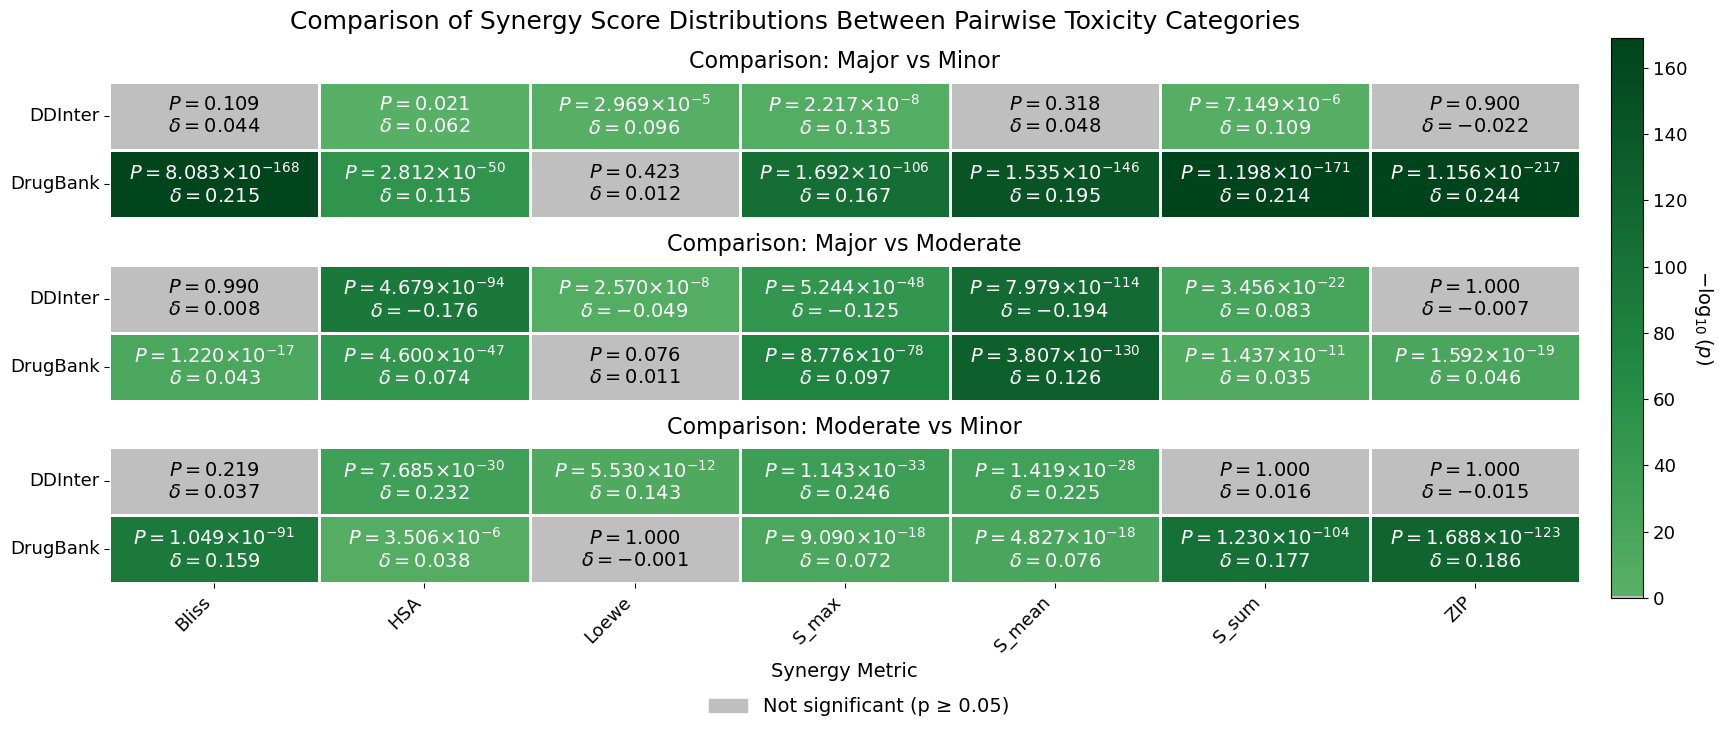

In [37]:
# Extract P-values and Effect Sizes from combined_syntox_df for Kruskal-Wallis test
dunn_results = combined_syntox_df[combined_syntox_df['Test_Type'] == 'Dunn Post-Hoc'].copy()
dunn_results['Index_Combined'] = (
    dunn_results['Database'] + ' - ' + dunn_results['Comparison']
)

# Obtain the list of unique databases and synery metrics
databases = dunn_results['Database'].unique()
comparisons = dunn_results['Comparison'].unique()
synergy_metrics = sorted(dunn_results['Synergy_Score'].unique())

# Change the explicit order to group by metric type first, then by database
row_order = []
for comp in comparisons: # This iterates through the metric types (e.g., 'Minor->Major')
    for db in databases:  # This iterates through the databases
        row_order.append(f"{db} - {comp}")

# P-value matrix
p_matrix = dunn_results.pivot_table(
    index='Index_Combined',
    columns='Synergy_Score',
    values='P_value_Corrected',
    aggfunc='first'
).reindex(index=row_order, columns=synergy_metrics)

# Effect Size (Cliff's Delta) matrix
delta_matrix = dunn_results.pivot_table(
    index='Index_Combined',
    columns='Synergy_Score',
    values='Effect_Size_Value',
    aggfunc='first'
).reindex(index=row_order, columns=synergy_metrics)

# --- (Data loading and matrix creation - crucial setup for slicing) ---
# Create annotation matrix function
def create_dunn_annotation_matrix(p_mat, delta_mat):
    # ... (Your existing function implementation) ...
    annot_matrix = pd.DataFrame(index=p_mat.index, columns=p_mat.columns, dtype=object)
    for metric in p_mat.index:
        for comparison in p_mat.columns:
            p_val = p_mat.loc[metric, comparison]
            delta_val = delta_mat.loc[metric, comparison]
            p_str = "P={:.3e}".format(p_val) if pd.notna(p_val) else r"$P=$NA"
            delta_str = rf"$\delta={delta_val:.3f}$" if pd.notna(delta_val) else r"$\delta=$NA"
            annot_matrix.loc[metric, comparison] = f"{p_str}\n{delta_str}"
    return annot_matrix

# Color map and normalization
val = p_matrix.copy().astype(float)
val[:] = np.where(p_matrix < 0.05, -np.log10(p_matrix), 0.0)
vmax = np.nanpercentile(val[val > 0], 95) if np.any(val > 0) else 1.0
norm = mcolors.Normalize(vmin=0, vmax=vmax)
colors = ["#c7e9c0", "#74c476", "#238b45", "#00441b"]
greens_mod = LinearSegmentedColormap.from_list("greens_mod", colors, N=256)
cmap_list = np.vstack((
    mcolors.to_rgba('#bfbfbf'),
    greens_mod(np.linspace(0.45, 1, 255))
))
cmap = ListedColormap(cmap_list)

# The total number of subplots is len(comparisons)
num_subplots = len(comparisons) 

# Create a figure that is vertically long enough
fig = plt.figure(figsize=(16, 7))
# Set up a grid of subplots for vertical stacking
gs = fig.add_gridspec(num_subplots, 1)

# List of database names for y-axis ticks
database_labels = databases # e.g., ['DrugBank', 'HSA']

for i, comp_title in enumerate(comparisons):
    # 1. SLICE THE DATA for the current comparison group
    # Get the row indices that belong to this comparison
    current_rows = [f"{db} - {comp_title}" for db in databases]
    
    # Slice the P-value and Delta matrices
    p_slice = p_matrix.loc[current_rows]
    delta_slice = delta_matrix.loc[current_rows]
    
    # Create the value matrix slice for plotting
    val_slice = np.where(p_slice < 0.05, -np.log10(p_slice), 0.0)
    
    # 2. CREATE A SUBPLOT
    ax = fig.add_subplot(gs[i, 0])
    
    # 3. PLOT THE HEATMAP
    sns.heatmap(
        val_slice,
        ax=ax,
        annot=False,
        cmap=cmap,
        norm=norm,
        linewidths=1,
        linecolor='white',
        cbar=False,
    )
    
    # 4. MANUAL ANNOTATIONS
    for r, row in enumerate(p_slice.index):
        for c, col in enumerate(p_slice.columns):
            p_val = p_slice.loc[row, col]
            d_val = delta_slice.loc[row, col]

            # Choose text color
            color = "black" if (pd.isna(p_val) or p_val >= 0.05) else "white"

            # Build label
            p_str = rf"$P={sci_fmt(p_val, 3)}$" if pd.notna(p_val) else r"$P=$NA"
            d_str = rf"$\delta={d_val:.3f}$"     if pd.notna(d_val) else r"$\delta=$NA"
            text  = p_str + "\n" + d_str

            ax.text(c + 0.5, r + 0.5, text,
                    ha='center', va='center',
                    color=color, fontsize=14)

    # 5. LABELS AND TITLES
    
    # Set the group title centered above the heatmap
    ax.set_title(f'Comparison: {comp_title}', fontsize=16, pad=10)
    
    # Y-axis labels: just the database names
    ax.set_yticklabels(database_labels, rotation=0, fontsize=13)
    ax.set_ylabel('') # Remove default y-label
    
    # X-axis labels:
    if i < num_subplots - 1:
        # Hide X-labels for all but the last (bottom) plot
        ax.set_xticks([])
        ax.set_xlabel('')
    else:
        # Show X-labels only for the last plot
        ax.set_xticklabels(p_slice.columns, rotation=45, ha='right', fontsize=13)
        ax.set_xlabel('Synergy Metric', fontsize=14)

# 6. ADD A SHARED COLORBAR to the side of the whole figure
cbar_ax = fig.add_axes([1.01, 0.14, 0.02, 0.8]) # [left, bottom, width, height]
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([]) # Create an empty array for the scalar mappable
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label(r'$-\log_{10}(p)$', rotation=270, labelpad=20, fontsize=14)
cbar.ax.tick_params(labelsize=13)

# 7. ADD THE NON-SIGNIFICANT LEGEND
not_sig_patch = mpatches.Patch(color='#bfbfbf', label='Not significant (p ≥ 0.05)')
fig.legend(handles=[not_sig_patch],
           loc='lower center',
           bbox_to_anchor=(0.54, -0.04), # Position below the last subplot
           borderaxespad=0, frameon=False, fontsize=14)
fig.suptitle('Comparison of Synergy Score Distributions Between Pairwise Toxicity Categories', fontsize=18)

plt.subplots_adjust(hspace=0.7) # Increase vertical spacing between subplots
plt.tight_layout()
plt.savefig('results/figure2/dunn_metric_pairwise_heatmap_w_effectsize.png', dpi=300, bbox_inches='tight')
plt.show()

<>:31: SyntaxWarning: invalid escape sequence '\d'
<>:36: SyntaxWarning: invalid escape sequence '\d'
<>:45: SyntaxWarning: invalid escape sequence '\d'
<>:46: SyntaxWarning: invalid escape sequence '\d'
<>:75: SyntaxWarning: invalid escape sequence '\d'
<>:83: SyntaxWarning: invalid escape sequence '\d'
<>:31: SyntaxWarning: invalid escape sequence '\d'
<>:36: SyntaxWarning: invalid escape sequence '\d'
<>:45: SyntaxWarning: invalid escape sequence '\d'
<>:46: SyntaxWarning: invalid escape sequence '\d'
<>:75: SyntaxWarning: invalid escape sequence '\d'
<>:83: SyntaxWarning: invalid escape sequence '\d'
/var/folders/2k/2mqgxp054vg_3wvy0pbmlt8h0000gn/T/ipykernel_2548/420718167.py:31: SyntaxWarning: invalid escape sequence '\d'
  ] = 'Significantly Higher Synergy ($\delta \geq 0.14$)'
/var/folders/2k/2mqgxp054vg_3wvy0pbmlt8h0000gn/T/ipykernel_2548/420718167.py:36: SyntaxWarning: invalid escape sequence '\d'
  ] = 'Significantly Lower Synergy ($\delta \leq -0.14$)'
/var/folders/2k/2mqgxp

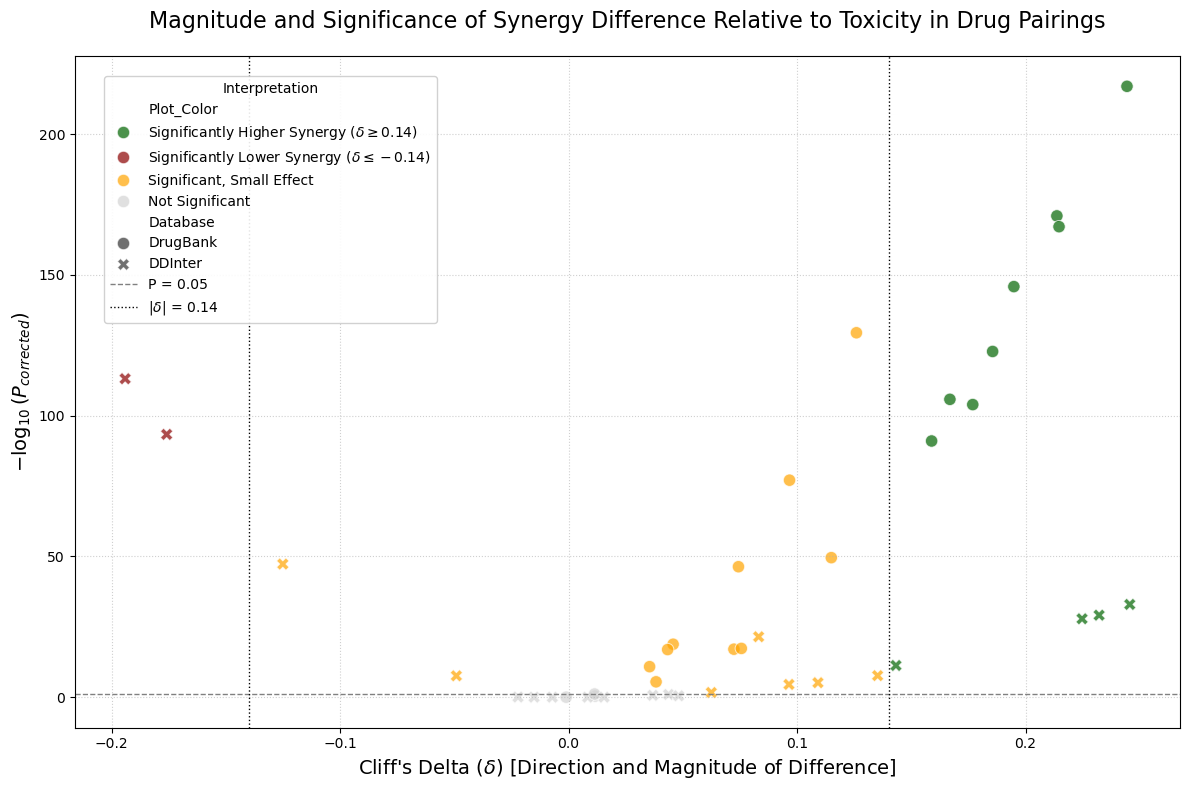

In [32]:
# Use a small epsilon to prevent log(0) issues for P=0
epsilon = np.finfo(float).eps
p_values = dunn_results['P_value_Corrected'].replace(0.0, epsilon)
dunn_results['Neg_Log_P'] = -np.log10(p_values)

# Cliff's Delta is already in 'Effect_Size_Value'
dunn_results['Cliff_Delta'] = dunn_results['Effect_Size_Value']

# Create a combined metric for color coding (e.g., Database + Comparison)
dunn_results['Group'] = dunn_results['Database'] + ' - ' + dunn_results['Comparison']

# --- 2. Define Thresholds and Labels ---

# Significance Threshold (P < 0.05)
P_THRESHOLD = 0.05
LOG_P_THRESHOLD = -np.log10(P_THRESHOLD)  # Approx 1.3

# Effect Size Thresholds (Interpretation of Cliff's Delta magnitude, e.g., small effect)
# Common thresholds: 0.14 (small), 0.33 (medium), 0.47 (large)
DELTA_THRESHOLD = 0.14 

# Create a column for labeling points (significant and large effect)
dunn_results['Is_Significant'] = (dunn_results['P_value_Corrected'] < P_THRESHOLD)
dunn_results['Is_Large_Effect'] = (np.abs(dunn_results['Cliff_Delta']) >= DELTA_THRESHOLD)
dunn_results['Plot_Color'] = 'Not Significant'

# Assign colors/labels based on criteria
dunn_results.loc[
    (dunn_results['Is_Significant']) & (dunn_results['Cliff_Delta'] > DELTA_THRESHOLD), 
    'Plot_Color'
] = 'Significantly Higher Synergy ($\delta \geq 0.14$)'

dunn_results.loc[
    (dunn_results['Is_Significant']) & (dunn_results['Cliff_Delta'] < -DELTA_THRESHOLD), 
    'Plot_Color'
] = 'Significantly Lower Synergy ($\delta \leq -0.14$)'

dunn_results.loc[
    (dunn_results['Is_Significant']) & (dunn_results['Cliff_Delta'].abs() < DELTA_THRESHOLD), 
    'Plot_Color'
] = 'Significant, Small Effect'

# Define custom color palette for the plot
color_palette = {
    'Significantly Higher Synergy ($\delta \geq 0.14$)': 'darkgreen',
    'Significantly Lower Synergy ($\delta \leq -0.14$)': 'darkred',
    'Significant, Small Effect': 'orange',
    'Not Significant': 'lightgray'
}

# Ensure the categories are ordered for plotting consistency
category_order = list(color_palette.keys())
dunn_results['Plot_Color'] = pd.Categorical(dunn_results['Plot_Color'], categories=category_order, ordered=True)
dunn_results.sort_values(by='Plot_Color', inplace=True) # Plot significant points last

# --- 3. Plotting the Volcano Plot ---
# --- Plot setup ---
fig, ax = plt.subplots(figsize=(12, 8))

sns.scatterplot(
    data=dunn_results,
    x='Cliff_Delta',
    y='Neg_Log_P',
    hue='Plot_Color',
    palette=color_palette,
    style='Database',
    s=80,
    alpha=0.7,
    hue_order=category_order,
    ax=ax
)

# --- Threshold lines ---
ax.axhline(y=LOG_P_THRESHOLD, color='gray', linestyle='--', linewidth=1, label=f'P = {P_THRESHOLD}')
ax.axvline(x=DELTA_THRESHOLD, color='black', linestyle=':', linewidth=1, label=f'|$\delta$| = {DELTA_THRESHOLD}')
ax.axvline(x=-DELTA_THRESHOLD, color='black', linestyle=':', linewidth=1)

# --- Axis titles & formatting ---
ax.set_title(
    "Magnitude and Significance of Synergy Difference Relative to Toxicity in Drug Pairings",
    fontsize=16, pad=20
)
ax.set_xlabel("Cliff's Delta ($\delta$) [Direction and Magnitude of Difference]", fontsize=14)
ax.set_ylabel("$-\\log_{10}(P_{corrected})$", fontsize=14)
ax.grid(True, linestyle=':', alpha=0.6)

# --- Legend inside plot (upper left) ---
leg = ax.legend(
    title='Interpretation',
    loc='upper left',              # anchor in upper-left corner
    bbox_to_anchor=(0.02, 0.98),   # small inset inside plot
    fontsize=10,
    frameon=True,
    framealpha=0.9,                # slight transparency
    facecolor='white'
)

# --- Adjust layout ---
fig.tight_layout()
fig.savefig(
    'results/database_syntox_analysis/volcano_plot_directional_differences.png',
    dpi=300,
    bbox_inches='tight'
)
plt.show()

/var/folders/2k/2mqgxp054vg_3wvy0pbmlt8h0000gn/T/ipykernel_2548/1628319686.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1]) # Adjust for colorbar


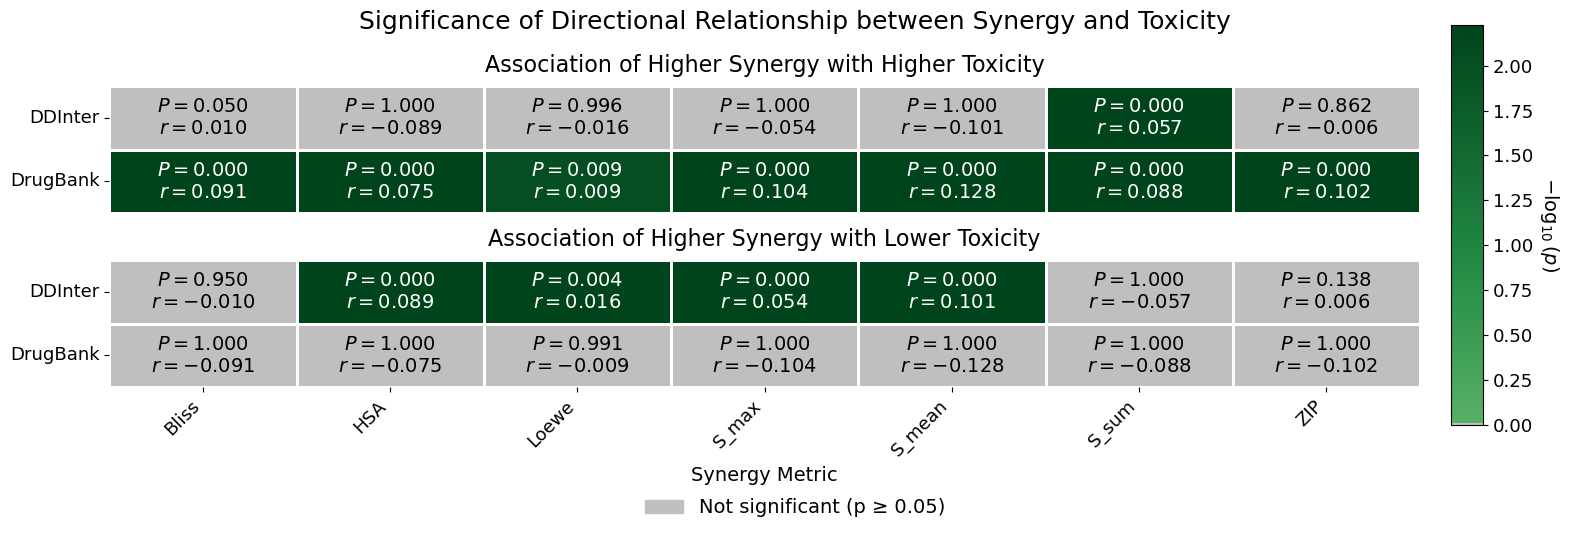

In [33]:
# --- Data Preparation and Matrix Re-pivoting ---

jt_results = combined_syntox_df[combined_syntox_df['Test_Type'] == 'Jonckheere-Terpstra'].copy()

# The columns now become the Synergy Metrics
synergy_metrics = sorted(jt_results['Synergy_Score'].unique()) 
databases = jt_results['Database'].unique()

# The rows will be the Database names
row_order = databases 

# The grouping element for the subplots is the Comparison (Trend)
original_keys = ['Increasing Trend (Minor->Major)', 'Decreasing Trend (Major->Minor)']
descriptive_titles = [
    'Association of Higher Synergy with Higher Toxicity',
    'Association of Higher Synergy with Lower Toxicity'
]
trend_mapping = dict(zip(original_keys, descriptive_titles))
trend_comparisons = original_keys 
num_subplots = len(trend_comparisons)

# PIVOT 1: P-value matrix (Metrics on columns, Database-Trend on index)
p_matrix = jt_results.pivot_table(
    index=['Database', 'Comparison'], 
    columns='Synergy_Score', 
    values='P_value', 
    aggfunc='first'
)

# PIVOT 2: Effect Size (r) matrix
r_matrix = jt_results.pivot_table(
    index=['Database', 'Comparison'], 
    columns='Synergy_Score', 
    values='Effect_Size_Value', 
    aggfunc='first'
)

# --- Color Map and Normalization Setup (As before) ---

# Generate the full value matrix for global normalization
# Define a small epsilon for P=0 replacement to avoid log(0)
epsilon = np.finfo(float).eps 

# 1. Generate the full value matrix for global normalization
val_full = p_matrix.astype(float).copy()

# Replace P=0 values with epsilon only where P is exactly 0.0
p_corrected = np.where(val_full == 0.0, epsilon, val_full)

# 2. Calculate -log10(P) only for significant values
val_full.loc[:, :] = np.where(
    p_corrected < 0.05, 
    -np.log10(p_corrected), 
    0.0 # Non-significant values are 0.0 (map to gray)
)
val_full = val_full.fillna(0.0) 

p_raw = jt_results['P_value'].astype(float).replace(0.0, epsilon)
val_max = -np.log10(p_raw[p_raw < 0.05].max())

# Normalization (Rest of this section remains the same)
vmax = np.nanpercentile(val_max, 95) if val_max > 0 else 1.0 # Ensure vmax is sensible
norm = mcolors.Normalize(vmin=0, vmax=vmax * 1.1) # Use a slightly larger vmax for scale

# Colormap
colors = ["#c7e9c0", "#74c476", "#238b45", "#00441b"]
greens_mod = LinearSegmentedColormap.from_list("greens_mod", colors, N=256)
cmap_list = np.vstack((mcolors.to_rgba('#bfbfbf'), greens_mod(np.linspace(0.45, 1, 255))))
cmap = ListedColormap(cmap_list)
cmap = cmap.with_extremes(bad='#bfbfbf', under='#bfbfbf')

# --- Multi-Panel Plotting ---

# Create a figure that is vertically long enough
fig = plt.figure(figsize=(16, 2.5 * num_subplots))
gs = fig.add_gridspec(num_subplots, 1)

for i, comp_key in enumerate(trend_comparisons):
    # Get the descriptive title (comp_title) for the plot title
    comp_title = trend_mapping[comp_key]
    
    # 1. SLICE THE DATA for the current comparison group (Trend)
    idx = pd.IndexSlice
    # *** CORRECT LINE: Use comp_key (the actual index value) for slicing ***
    p_slice = p_matrix.loc[idx[:, comp_key], :]
    r_slice = r_matrix.loc[idx[:, comp_key], :]
    
    p_slice.index = p_slice.index.get_level_values('Database')
    r_slice.index = r_slice.index.get_level_values('Database')
    
    # --- CRITICAL FIX 1: Correct P=0 and calculate log for the slice ---
    epsilon = np.finfo(float).eps # Ensure epsilon is available here
    p_corrected = p_slice.replace(0.0, epsilon)
    
    val_slice = np.where(
        p_corrected < 0.05, 
        -np.log10(p_corrected), 
        0.0
    )
    val_slice = pd.DataFrame(val_slice, index=p_slice.index, columns=p_slice.columns).fillna(0.0)

    # 2. CREATE A SUBPLOT
    ax = fig.add_subplot(gs[i, 0])
    
    # 3. PLOT THE HEATMAP
    sns.heatmap(
        val_slice, 
        ax=ax,
        annot=False,
        cmap=cmap,
        norm=norm,
        linewidths=1,
        linecolor='white',
        cbar=False,
    )
    
    # 4. MANUAL ANNOTATIONS (Uses comp_key for P-value logic)
    for r, db_name in enumerate(p_slice.index):
        for c, metric in enumerate(p_slice.columns):
            p_val = p_slice.loc[db_name, metric]
            r_val = r_slice.loc[db_name, metric]

            color = "white" if (pd.notna(p_val) and p_val < 0.05) else "black"
            
            p_str = rf"$P={sci_fmt(p_val, 4)}$" if pd.notna(p_val) else r"$P=$NA"
            r_str = rf"$r={r_val:.3f}$"          if pd.notna(r_val) else r"$r=$NA"
            text  = p_str + "\n" + r_str

            ax.text(c + 0.5, r + 0.5, text,
                    ha='center', va='center',
                    color=color, fontsize=14)
            
    # 5. LABELS AND TITLES
    
    # Set the group title centered above the heatmap
    ax.set_title(f'{comp_title}', fontsize=16, pad=10)
    
    # Y-axis labels: just the database names
    ax.set_yticklabels(p_slice.index.tolist(), rotation=0, fontsize=13)
    ax.set_ylabel('') # Remove default y-label
    
    # X-axis labels:
    if i < num_subplots - 1:
        # Hide X-labels for all but the last (bottom) plot
        ax.set_xticks([])
        ax.set_xlabel('')
    else:
        # Show X-labels only for the last plot (Metrics)
        ax.set_xticklabels(p_slice.columns, rotation=45, ha='right', fontsize=13)
        ax.set_xlabel('Synergy Metric', fontsize=14)

# 6. ADD A SHARED COLORBAR and LEGEND
cbar_ax = fig.add_axes([0.91, 0.15, 0.02, 0.8]) # [left, bottom, width, height]
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax)
# Ensure the color bar label font size is large enough
cbar.set_label(r'$-\log_{10}(p)$', rotation=270, labelpad=20, fontsize=14)
cbar.ax.tick_params(labelsize=13)

# Add the Non-Significant Legend
not_sig_patch = mpatches.Patch(color='#bfbfbf', label='Not significant (p ≥ 0.05)')
fig.legend(handles=[not_sig_patch],
           loc='lower center',
           bbox_to_anchor=(0.5, -0.05),
           borderaxespad=0, frameon=False, fontsize=14)
fig.suptitle('Significance of Directional Relationship between Synergy and Toxicity', fontsize=18)

plt.subplots_adjust(hspace=0.7) # Increase vertical spacing between subplots
plt.tight_layout(rect=[0, 0, 0.9, 1]) # Adjust for colorbar
plt.savefig('results/figure2/JonckheereTerpstra_heatmap_w_effectsize.png', dpi=300, bbox_inches='tight')
plt.show()

In [34]:
# Define expected metrics and databases for looping
metrics = ['Bliss', 'HSA', 'ZIP', 'Loewe', 'S_max', 'S_mean', 'S_sum']
databases = ['DrugBank', 'DDInter'] 

# Retrieve all necessary data for one test/database/metric combination 
def get_stats_data(df, metric, db, test_type, comparison=''):
    """
    Filters the DataFrame for a specific test result and extracts the Statistic, 
    P-value, Effect Size, and Effect Symbol.
    """
    
    # Determine which P-value column to use and the Effect Size Symbol
    if test_type == 'Kruskal-Wallis':
        p_col = 'P_value'
        e_symbol = '\\eta^2'
    elif test_type == 'Dunn Post-Hoc':
        p_col = 'P_value_Corrected'
        e_symbol = '\\delta'
    elif test_type == 'Jonckheere-Terpstra':
        p_col = 'P_value'
        e_symbol = 'r'
    else:
        return np.nan, np.nan, np.nan, ''

    # Filter the DataFrame
    result_row = df[
        (df['Synergy_Score'] == metric) &
        (df['Database'] == db) &
        (df['Test_Type'] == test_type) &
        (df['Comparison'] == comparison)
    ]

    if result_row.empty:
        # Return standard NaN placeholders if no data found
        return np.nan, np.nan, np.nan, e_symbol
    
    # Extract values
    row = result_row.iloc[0]
    
    # Test Statistic (assumed to be H for KW, Z for JT, and NaN/blank for Dunn)
    stat = row.get('Test_Statistic', np.nan)
    
    p = row.get(p_col, np.nan)
    e = row.get('Effect_Size_Value', np.nan)

    return stat, p, e, e_symbol


# Function to format the P-value and Effect Size for LaTeX
def format_p_effect(p_value, effect_size, effect_symbol):
    """Formats P-value and Effect Size into the string P-value (Effect Size Symbol = Value)."""
    
    # Check for missing data
    if pd.isna(p_value) or pd.isna(effect_size):
         return '-'
         
    # P-value Formatting
    if p_value >= 0.05:
        # For non-significant P-values: e.g., 0.10, >0.99. All must be in math mode.
        p_str = "${:.3f}$".format(p_value)
    else:
        # Handle P-value of zero or near-zero
        if p_value <= 1e-300: # Use a safe threshold
            p_str = "${:.3f}$".format(p_value)
        else:
            # For significant P-values: use scientific notation. All must be in math mode.
            exponent = int(np.floor(np.log10(p_value)))
            mantissa = p_value / 10**exponent
            p_str = "${:.3f} \\times 10^{{{:d}}}$".format(mantissa, exponent)
    
    # Effect Size Formatting
    # Ensure correct sign formatting for the effect size
    sign = "+" if effect_size >= 0 else ""
    effect_str = "{}{:.3f}".format(sign, effect_size)
    
    # Combine P-value and effect size with the correct symbol. All symbols and values must be in math mode.
    return f"{p_str} ($\\mathbf{{{effect_symbol}}}={effect_str}$)"

# --- Function to format the Test Statistic ---
def format_statistic(stat):
    """Formats the Test Statistic (H or Z) into a clean LaTeX string."""
    print(f"Formatting statistic: {stat} (type: {type(stat)})")
    
    stat_type = str(stat.split('=')[0])
    stat_val = float(stat.split('=')[1])
    print(stat_val)

    abs_stat = abs(stat_val)
    if abs_stat >= 10:
        exponent = int(np.floor(np.log10(abs_stat)))
        mantissa = abs_stat / 10**exponent
        sign = "-" if stat_val < 0 else ""
        print(f"stat type: {stat_type}, stat value: {stat_val}")
        return f"${sign}{mantissa:.3f} \\times 10^{{{exponent:d}}}$"
    else:
        # Fixed decimal for smaller stats, enclosed in math mode
        return "${:.3f}$".format(stat_val)

# Generate LaTex Table
def generate_latex_table_from_df(df, metrics_list, databases_list):
    """Generates the final LaTeX code string for the summary table based on the DataFrame."""
    
    # Define the 6 Test rows for each Synergy Score, matching the DataFrame columns
    test_rows_map = [
        ('Kruskal-Wallis', 'Kruskal-Wallis', 'All Groups'),
        ('Dunn: Major/Minor', 'Dunn Post-Hoc', 'Major vs Minor'),
        ('Dunn: Major/Moderate', 'Dunn Post-Hoc', 'Major vs Moderate'),
        ('Dunn: Moderate/Minor', 'Dunn Post-Hoc', 'Moderate vs Minor'),
        ('Jonckheere-Terpstra: Increasing Toxicity', 'Jonckheere-Terpstra', 'Increasing Trend (Minor->Major)'),
        ('Jonckheere-Terpstra: Decreasing Toxicity', 'Jonckheere-Terpstra', 'Decreasing Trend (Major->Minor)'),
    ]
    
    # Start of LaTeX Table Code (Using your requested structure)
    latex_code = [
        "\\begin{table}[htbp]",
        "\\centering",
        "\\small", # Requested formatting
        "\\caption{\\textbf{Statistical analysis of synergy scores by toxicity category.} Results of statistical analysis assessing the relationship between synergy score distributions and known DDI severity categories. Each section corresponds to a different synergy scoring method: Bliss, HSA, Loewe, ZIP, S\\_max, S\\_mean, or S\\_sum. The results for the Kruskal-Wallis, Dunn with Bonferroni correction, and Jonckheere-Terpstra tests are included for both the DrugBank and DDInter datasets. The Jonckheere-Terpestra Increasing Toxicity test assesses whether the distribution of the Jaccard Similarity increases when toxicity categories become more severe, while the Jonckheere-Terpstra Decreasing Toxicity test evaluates if the Jaccard Similarity distributions increase when the toxicity categories decrease in severity.}",
        "\\label{tab:s_syntox_stats}",
        "\\vspace{0.5em}", # Requested formatting
        "\\resizebox{\\textwidth}{!}{", 
        "\\scriptsize", # Use smallest common font size
        "\\begin{tabular}{ll|rr|rr}", # l=Score, l=Test, r r = DrugBank, r r = DDInter
        "\\toprule",
    ]
    
    # Header Rows
    header_row_1 = ["\\textbf{Synergy}", "\\textbf{Test}", 
                    "\\multicolumn{2}{c|}{\\textbf{DrugBank}}", 
                    "\\multicolumn{2}{c}{\\textbf{DDInter}}"]
    latex_code.append(" & ".join(header_row_1) + " \\\\")
    
    # P-value column now includes Effect Size
    header_row_2 = ["\\textbf{Score}", "", "\\textbf{Test Statistic}", 
                    "\\textbf{P-value (Effect Size)}", 
                    "\\textbf{Test Statistic}", 
                    "\\textbf{P-value (Effect Size)}"]
    latex_code.append(" & ".join(header_row_2) + " \\\\")

    latex_code.append("\\midrule")
    
    # Data Rows 
    for i, metric in enumerate(metrics_list):
        # Escape underscores in synergy scores (e.g., S\_max) for text mode
        escaped_metric = metric.replace('_', '\\_') 
        score_cell = f"\\multirow{{{len(test_rows_map)}}}{{*}}{{\\textbf{{{escaped_metric}}}}}"
        
        for j, (display_name, test_type, comparison_col) in enumerate(test_rows_map):
            
            # 1. Get DrugBank Data
            stat_db, p_db, e_db, e_symbol = get_stats_data(df, metric, 'DrugBank', test_type, comparison_col)
            
            # 2. Get DDInter Data
            stat_dd, p_dd, e_dd, _ = get_stats_data(df, metric, 'DDInter', test_type, comparison_col) 
            
            # 3. Format Strings
            p_e_db_str = format_p_effect(p_db, e_db, e_symbol)
            p_e_dd_str = format_p_effect(p_dd, e_dd, e_symbol)
            
            # Statistic is required for Kruskal-Wallis and Jonckheere-Terpstra, but not Dunn post-hoc
            is_statistic_required = test_type == 'Kruskal-Wallis' or test_type == 'Jonckheere-Terpstra'

            # Format Statistic (display '-' if not required or if the data is missing/invalid)
            stat_db_str = format_statistic(stat_db) if is_statistic_required else '-'
            stat_dd_str = format_statistic(stat_dd) if is_statistic_required else '-'

            # 4. Construct Row
            row_cells = [
                score_cell if j == 0 else "", 
                display_name,
                stat_db_str,
                p_e_db_str,
                stat_dd_str,
                p_e_dd_str
            ]
            latex_code.append(" & ".join(row_cells) + " \\\\")

        # Add horizontal rule after each metric group, except the last one
        if i < len(metrics_list) - 1:
            latex_code.append("\\midrule")
            
    # --- Footer ---
    latex_code.append("\\bottomrule")
    latex_code.append("\\end{tabular}")
    latex_code.append("}") # Closing bracket for \resizebox
    latex_code.append("\\end{table}")
    
    return "\n".join(latex_code)

# Now generate the table
latex_output = generate_latex_table_from_df(combined_syntox_df, metrics, databases)

# Print the output to the console (standard behavior)
print(latex_output)

filename = "results/figure2/statistical_summary_table.tex"
with open(filename, 'w', encoding='utf-8') as f:
            f.write(latex_output)
print(f"Success! LaTeX table saved to {filename}")
print(latex_output)


Formatting statistic: H=7.7022e+02 (type: <class 'str'>)
770.22
stat type: H, stat value: 770.22
Formatting statistic: H=4.4914e+00 (type: <class 'str'>)
4.4914
Formatting statistic: Z=2.2832e+01 (type: <class 'str'>)
22.832
stat type: Z, stat value: 22.832
Formatting statistic: Z=1.6444e+00 (type: <class 'str'>)
1.6444
Formatting statistic: Z=-2.2832e+01 (type: <class 'str'>)
-22.832
stat type: Z, stat value: -22.832
Formatting statistic: Z=-1.6444e+00 (type: <class 'str'>)
-1.6444
Formatting statistic: H=3.5306e+02 (type: <class 'str'>)
353.06
stat type: H, stat value: 353.06
Formatting statistic: H=5.1988e+02 (type: <class 'str'>)
519.88
stat type: H, stat value: 519.88
Formatting statistic: Z=1.8743e+01 (type: <class 'str'>)
18.743
stat type: Z, stat value: 18.743
Formatting statistic: Z=-1.5109e+01 (type: <class 'str'>)
-15.109
stat type: Z, stat value: -15.109
Formatting statistic: Z=-1.8743e+01 (type: <class 'str'>)
-18.743
stat type: Z, stat value: -18.743
Formatting statistic:

In [35]:

files = glob.glob("results/figure2/*_v_toxcats_*_box.png")
for f in files:
    print(f)

results/figure2/Loewe_v_toxcats_drugbank_box.png
results/figure2/Bliss_v_toxcats_ddinter_box.png
results/figure2/ZIP_v_toxcats_drugbank_box.png
results/figure2/S_sum_v_toxcats_drugbank_box.png
results/figure2/S_max_v_toxcats_ddinter_box.png
results/figure2/ZIP_v_toxcats_ddinter_box.png
results/figure2/S_mean_v_toxcats_ddinter_box.png
results/figure2/Loewe_v_toxcats_ddinter_box.png
results/figure2/HSA_v_toxcats_ddinter_box.png
results/figure2/Bliss_v_toxcats_drugbank_box.png
results/figure2/S_mean_v_toxcats_drugbank_box.png
results/figure2/S_max_v_toxcats_drugbank_box.png
results/figure2/S_sum_v_toxcats_ddinter_box.png
results/figure2/HSA_v_toxcats_drugbank_box.png


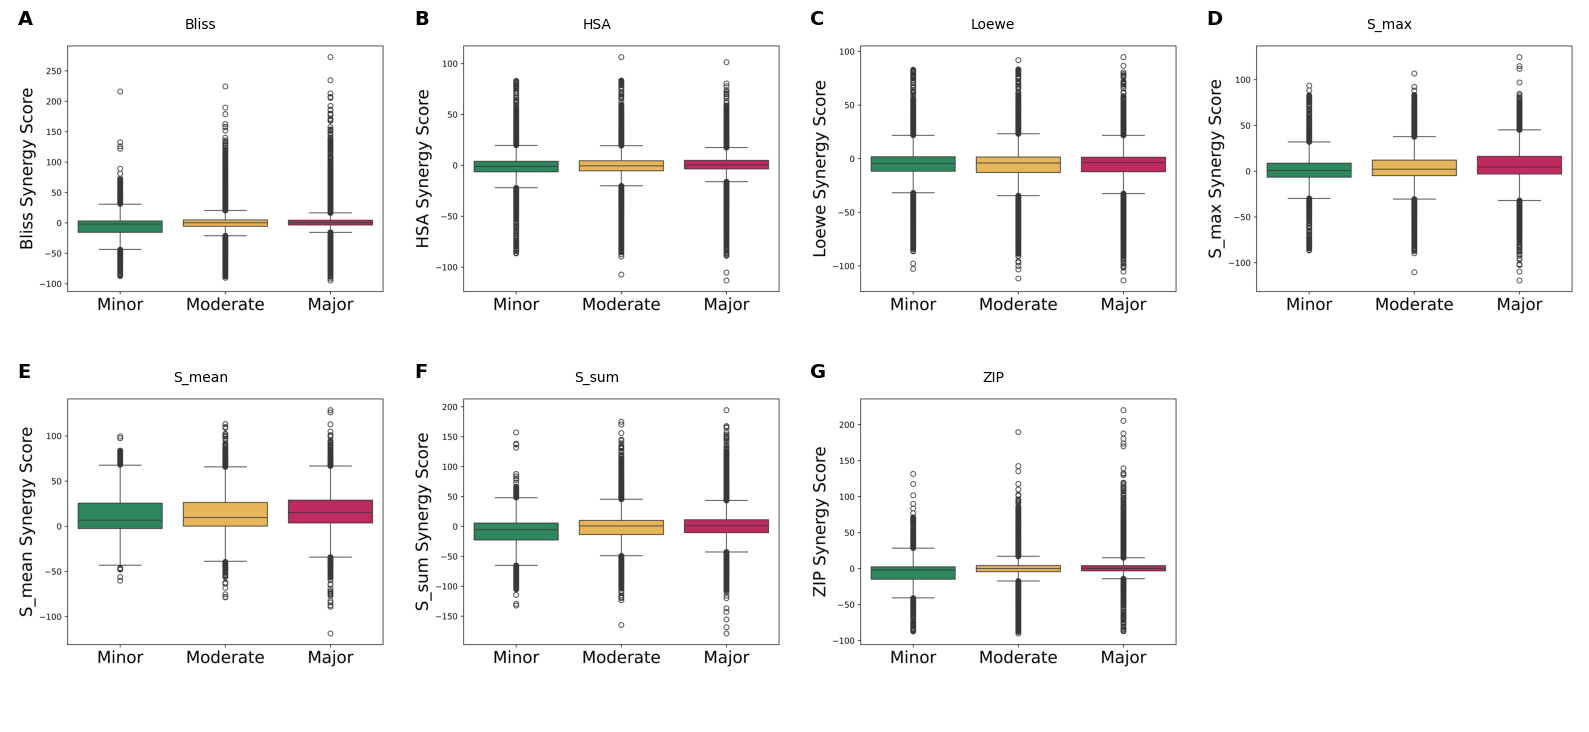

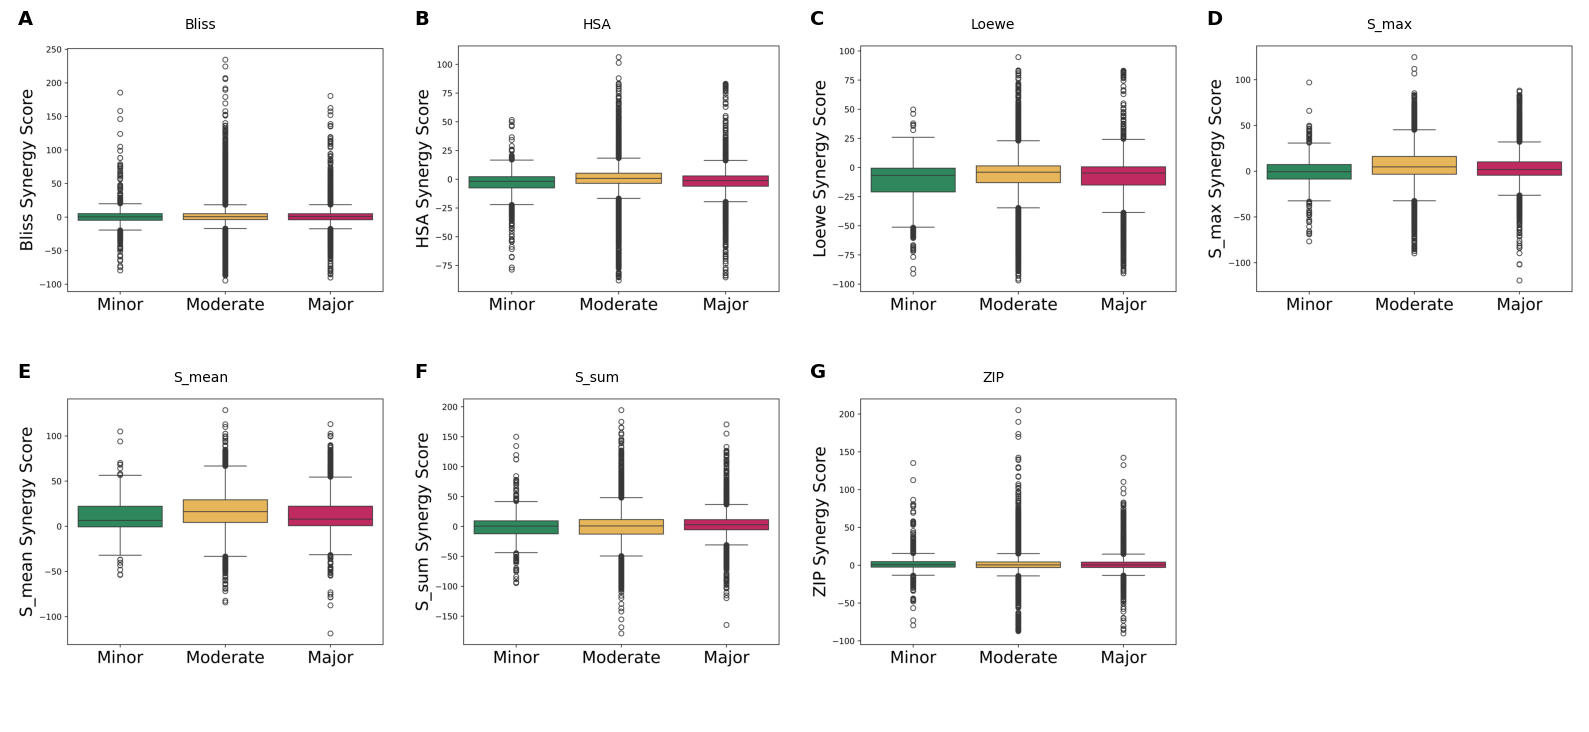

Saved combined panels to: results/figure2/ddinter_synergy_metric_distributions.jpg


In [36]:
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import math
import re
import string  # needed

SRC = Path("results/figure2")

# match files like: <metric>_v_toxcats_<database>_box.png
pattern = re.compile(r"(.+)_v_toxcats_(.+)_box\.png$", re.IGNORECASE)
files_by_db = {}

# group by database
for f in SRC.glob("*_v_toxcats_*_box.png"):
    m = pattern.match(f.name)
    if not m:
        continue
    metric, database = m.groups()
    files_by_db.setdefault(database.lower(), []).append((metric, f))

# Create plots
for db, items in files_by_db.items():
    if not items:
        continue

    # sort metrics alphabetically
    items.sort(key=lambda x: x[0].lower())

    n = len(items)
    nrows = 2
    ncols = math.ceil(n / nrows)

    fig, axes = plt.subplots(nrows, ncols, figsize=(4 * ncols, 4 * nrows))
    axes = axes.flatten() if n > 1 else [axes]

    add_labels = n >= 4
    label_iter = iter(string.ascii_uppercase)

    for i, (metric, fpath) in enumerate(items):
        ax = axes[i]
        with Image.open(fpath) as img:
            ax.imshow(img)
        ax.set_title(metric, fontsize=10)
        ax.axis("off")

        if add_labels:
            ax.text(
                0.02, 1.03, next(label_iter),
                transform=ax.transAxes,
                fontsize=14, fontweight="bold",
                va="bottom", ha="left",
                bbox=dict(facecolor="white", alpha=0.6, edgecolor="none", pad=2)
            )

    # Turn off any unused axes
    for ax in axes[len(items):]:
        ax.axis("off")

    plt.tight_layout(rect=[0, 0, 1, 0.95])

    # Save combined panel
    out_file = f"results/figure2/{db}_synergy_metric_distributions.jpg"
    fig.savefig(out_file, dpi=300, bbox_inches="tight")
    plt.show()
    plt.close(fig)

print(f"Saved combined panels to: {out_file}")